# PARTE 33 - ÁRBOLES Y BOSQUES DE CLASIFICACIÓN

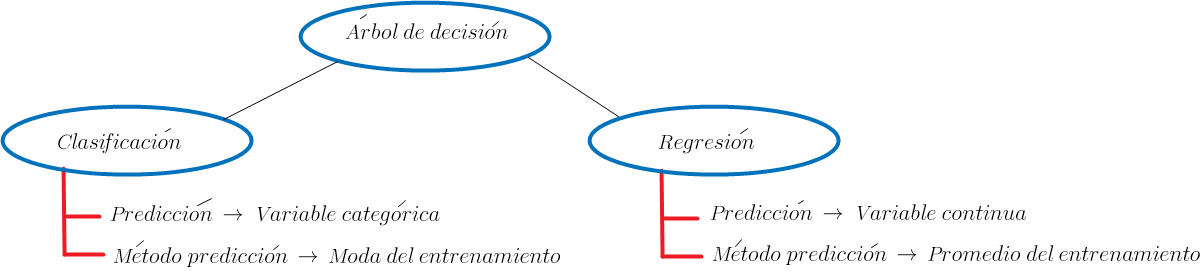

In [188]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/ÁRBOL DECISIÓN.png")

## PARTE 33.1: TEORÍA ÁRBOL DE CLASIFICACIÓN

#### MODELO DE ÁRBOL DE CLASIFICACIÓN

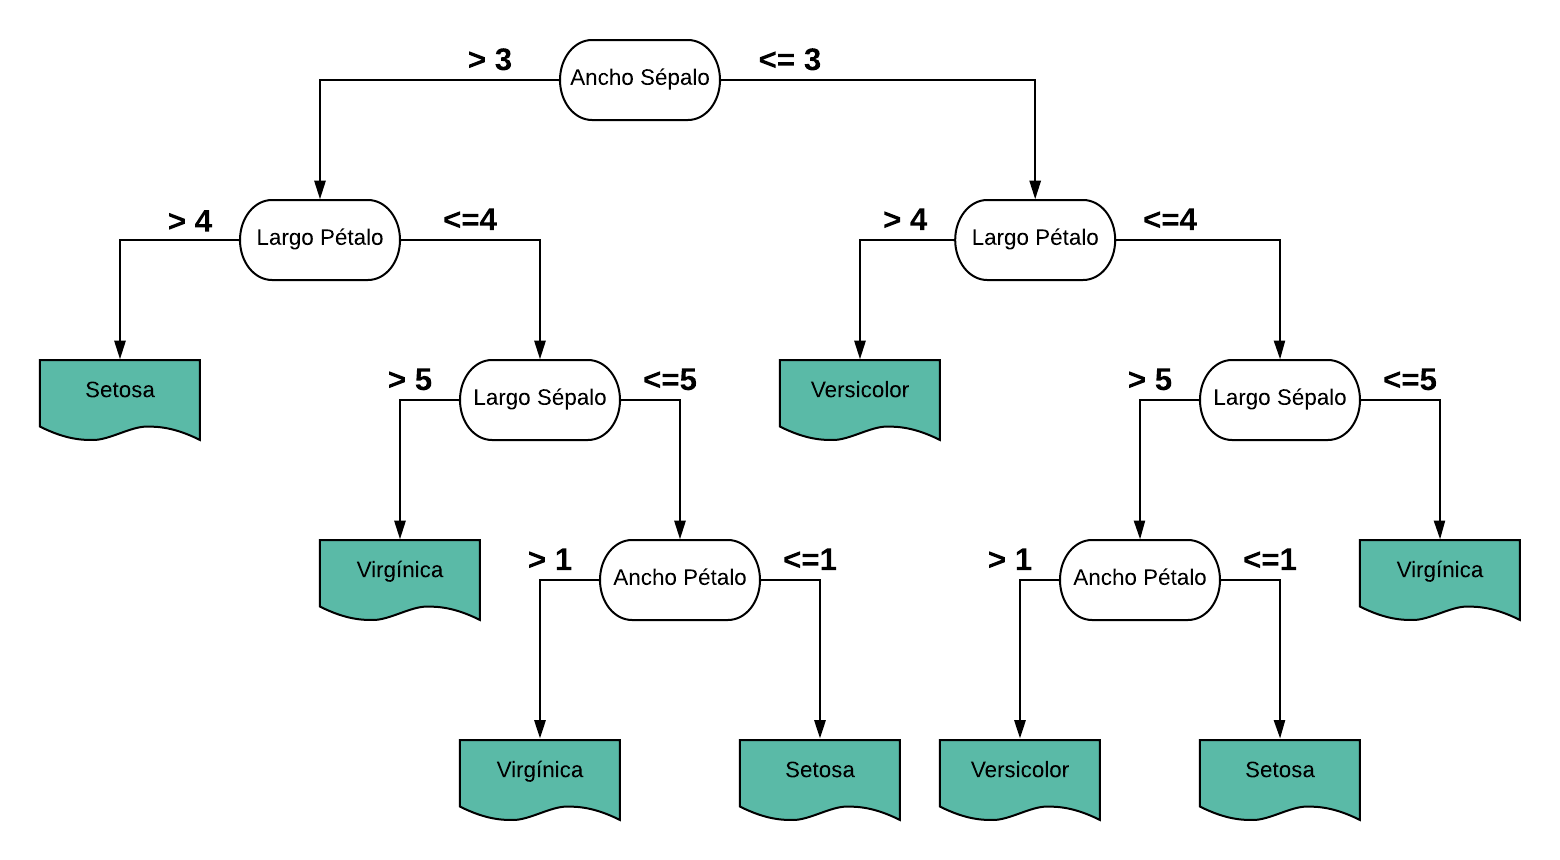

In [189]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/ÁRBOL CLASIFICACIÓN.png")

#### DEFINICIÓN DE ENTROPÍA

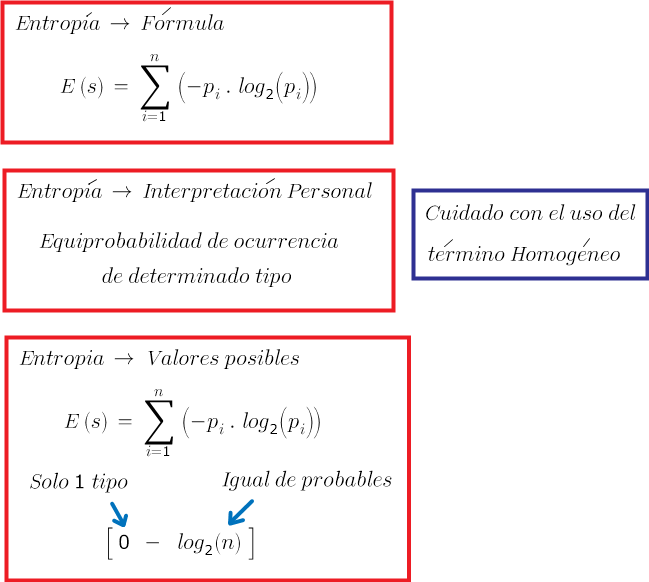

In [190]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/ENTROPÍA DEFINICIÓN.png")

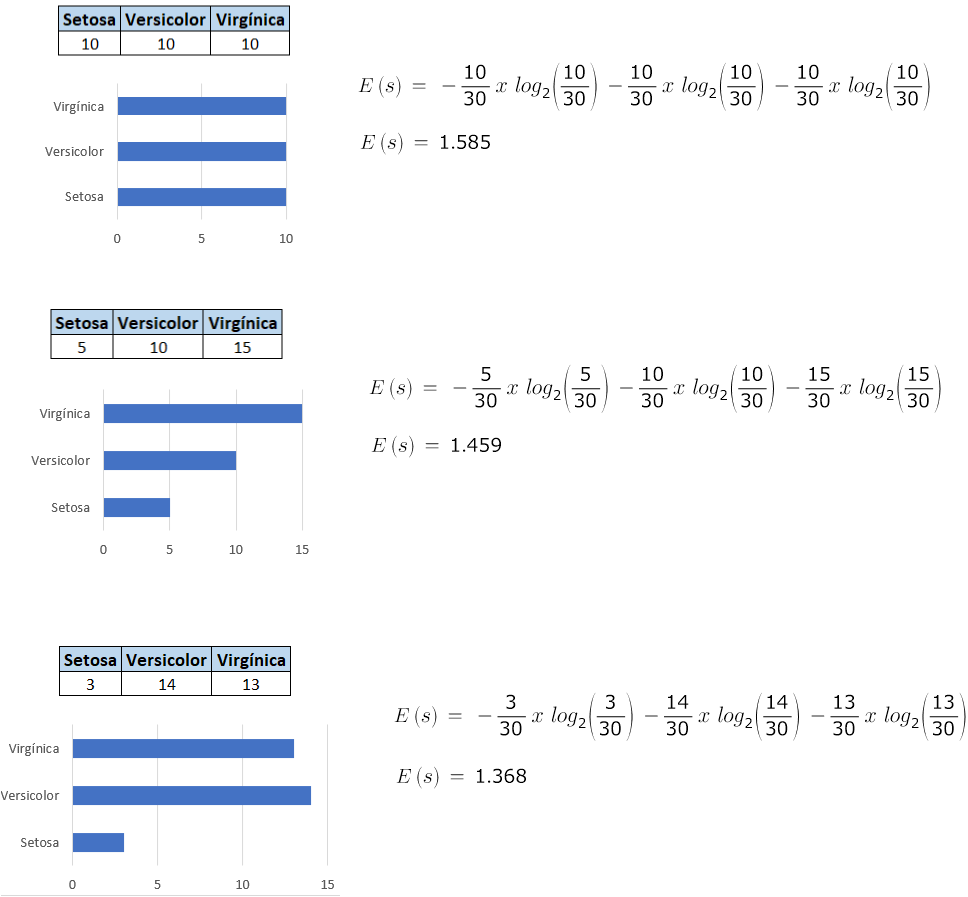

In [191]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/ENTROPÍA CÁLCULO.png")

#### DEFINICIÓN DE GANANCIA DE INFORMACIÓN

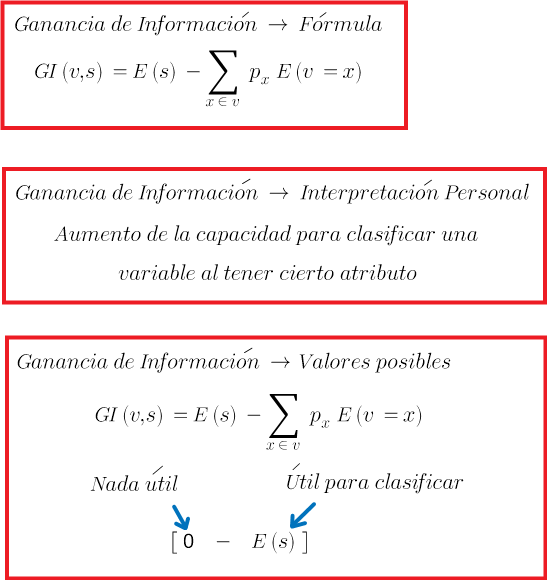

In [192]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/GANANCIA DE INFORMACIÓN DEFINICIÓN.png")

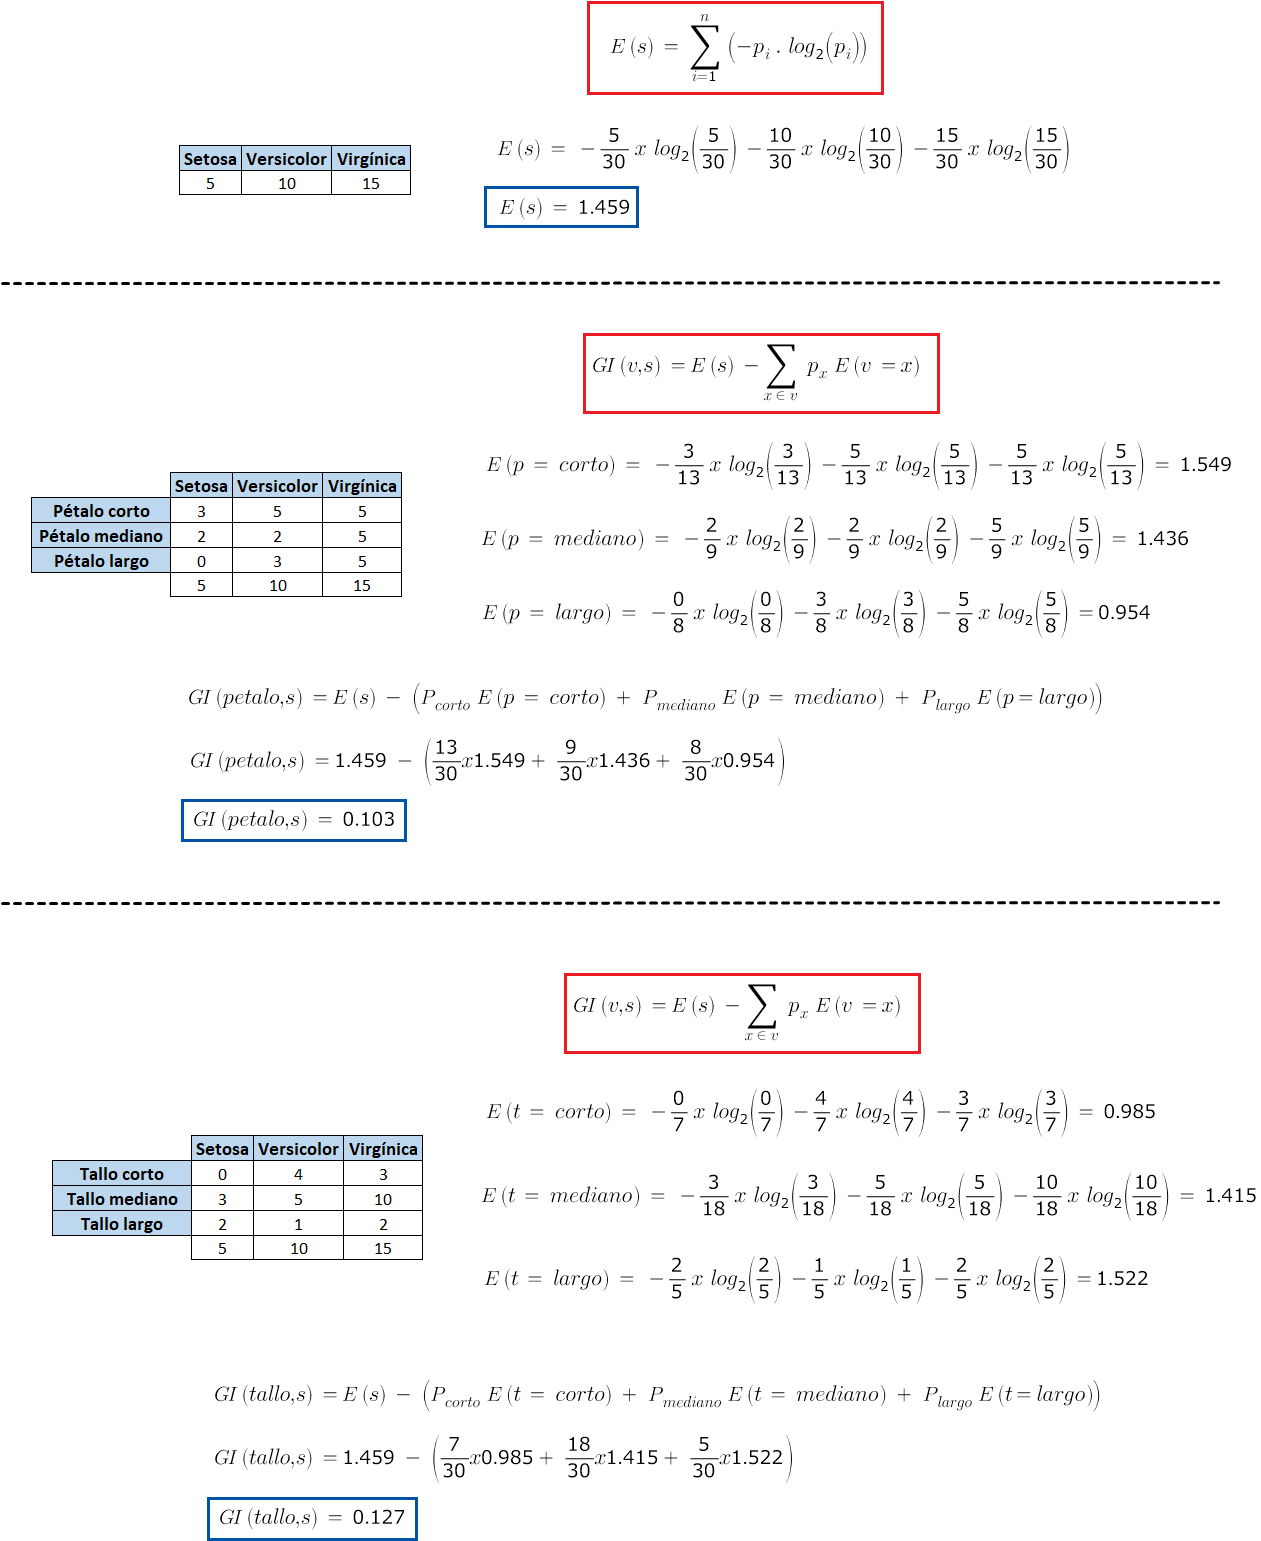

In [193]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/GANANCIA DE INFORMACIÓN CÁLCULO.png")

#### DEFINICIÓN DE ÍNDICE DE GINI

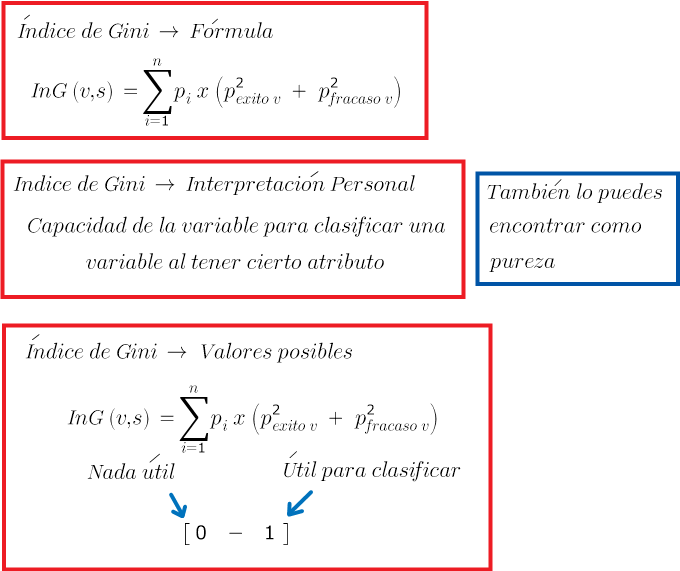

In [194]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/GINI DEFINICIÓN.png")

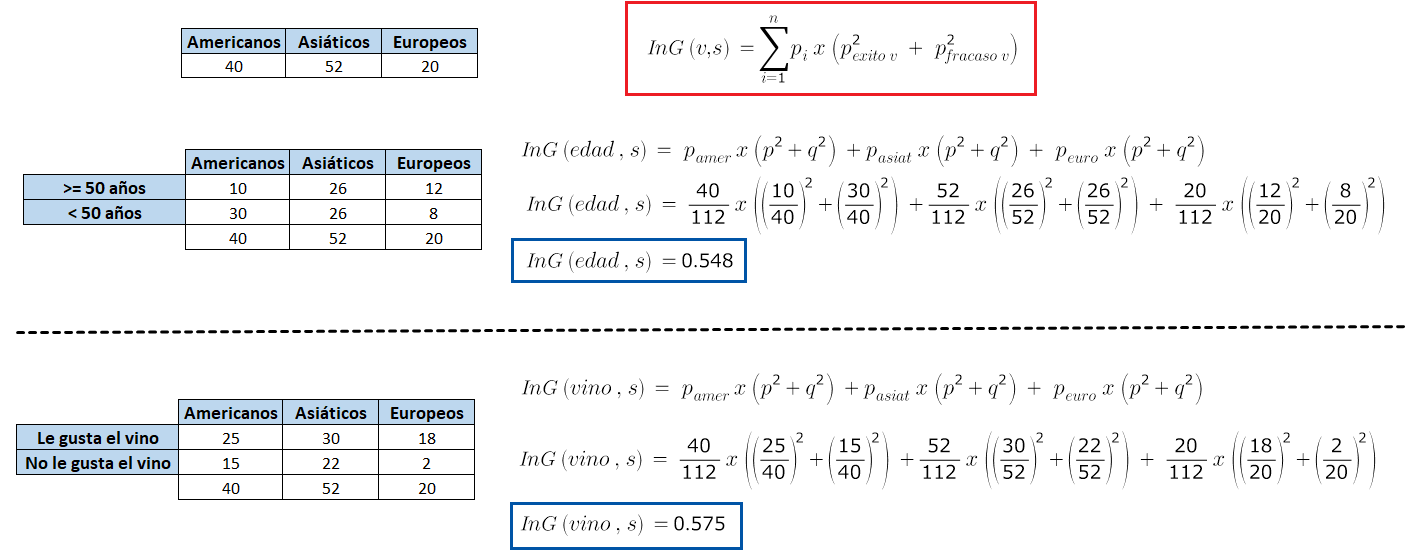

In [195]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/GINI CÁLCULO.png")

## PARTE 33.2: GENERACIÓN DE ÁRBOL CLASIFICACIÓN SIN PODAR --> DIABETES

### GENERACIÓN DE ÁRBOL SIN PODAR

In [196]:
#----------------------------------------------------------------------------
#IMPORTACIÓN DE DATASET
import pandas as pd
RUTA = "DATASETS - CERTIFICACIÓN/29_2_DIABETES.csv"
DATASET = pd.read_csv(RUTA)

#----------------------------------------------------------------------------
#DIVIDIR DATASET EN ENTRENAMIENTO Y PRUEBAS
from sklearn.model_selection import train_test_split
DATASET_ENTRENAMIENTO , DATASET_PRUEBAS = train_test_split(DATASET ,test_size = 0.2, random_state = 2021)

DATASET_ENTRENAMIENTO = DATASET_ENTRENAMIENTO.reset_index()
DATASET_ENTRENAMIENTO = DATASET_ENTRENAMIENTO.drop(["index"],axis = 1)

DATASET_PRUEBAS = DATASET_PRUEBAS.reset_index()
DATASET_PRUEBAS = DATASET_PRUEBAS.drop(["index"],axis = 1)

#----------------------------------------------------------------------------
#VARIABLES PREDICHAS Y PREDICTORAS
VY = "Outcome"
VX = DATASET.columns.tolist()
VX.remove(VY)

#GENERACIÓN DE DATASET PREDICHO Y PREDICTOR
DATASET_ENTRENAMIENTO_Y = DATASET_ENTRENAMIENTO[VY].copy()
DATASET_ENTRENAMIENTO_X = DATASET_ENTRENAMIENTO[VX].copy()

DATASET_PRUEBAS_Y = DATASET_PRUEBAS[VY].copy()
DATASET_PRUEBAS_X = DATASET_PRUEBAS[VX].copy()

#----------------------------------------------------------------------------
#GENERACIÓN DE ÁRBOL DE CLASIFICACIÓN
from sklearn.tree import DecisionTreeClassifier
#criterion -> entropy / gini
#min_samples_split -> CANTIDAD MÍNIMA DE MUESTRAS EN UN NODO PARA SUBDIVIDIRSE
#min_samples_leaf -> CANTIDAD MÍNIMA DE MUESTRAS EN UNA HOJA PARA EXISTIR 
#max_depth -> PROFUNDIDAD MÁXIMA PERMITIDA 

MODELO_ARBOL = DecisionTreeClassifier(criterion = 'entropy' , max_depth=7)
MODELO_ARBOL.fit(DATASET_ENTRENAMIENTO_X, DATASET_ENTRENAMIENTO_Y)

#----------------------------------------------------------------------------
#VARIABLES RELEVANTES DE ÁRBOL DE CLASIFICACIÓN
RANKING_VARIABLES = pd.DataFrame({
                            'VARIABLE': DATASET_ENTRENAMIENTO_X.columns.tolist(),
                            'IMPORTANCIA': MODELO_ARBOL.feature_importances_
                            })

RANKING_ORDENADO = RANKING_VARIABLES.sort_values('IMPORTANCIA', ascending=False).reset_index()
RANKING_ORDENADO = RANKING_ORDENADO.drop(["index"], axis = 1)

print("--------VARIABLES PREDICTORAS RELEVANTES--------")
print(RANKING_ORDENADO[RANKING_ORDENADO["IMPORTANCIA"]>0]["VARIABLE"].tolist())

#----------------------------------------------------------------------------
#GENERACIÓN DE PREDICCIÓN
DATASET_ENTRENAMIENTO["ÁRBOL PREDICT"] = MODELO_ARBOL.predict(DATASET_ENTRENAMIENTO_X)
DATASET_PRUEBAS["ÁRBOL PREDICT"] = MODELO_ARBOL.predict(DATASET_PRUEBAS_X)

#----------------------------------------------------------------------------
#SCORE DEL MODELO
print("---------------------------SCORE ÁRBOL SIN PODAR---------------------------")
print("SCORE ÁRBOL ENTRENAMIENTO -> ",MODELO_ARBOL.score(X = DATASET_ENTRENAMIENTO_X , y = DATASET_ENTRENAMIENTO_Y))
print("SCORE ÁRBOL PRUEBAS -> ",MODELO_ARBOL.score(X = DATASET_PRUEBAS_X , y = DATASET_PRUEBAS_Y))

from sklearn.metrics import accuracy_score
PRECISION_MODELO = accuracy_score( y_true    = DATASET_PRUEBAS[VY],
                                   y_pred    = DATASET_PRUEBAS["ÁRBOL PREDICT"],
                                   normalize = True)
print("PRECISIÓN MODELO -> ", PRECISION_MODELO)

--------VARIABLES PREDICTORAS RELEVANTES--------
['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'BloodPressure', 'Insulin', 'Pregnancies', 'SkinThickness']
---------------------------SCORE ÁRBOL SIN PODAR---------------------------
SCORE ÁRBOL ENTRENAMIENTO ->  0.8811074918566775
SCORE ÁRBOL PRUEBAS ->  0.7207792207792207
PRECISIÓN MODELO ->  0.7207792207792207


In [197]:
#GENERANDO TABLA CRUZADA - PRUEBAS
pd.crosstab(DATASET_PRUEBAS[VY], DATASET_PRUEBAS["ÁRBOL PREDICT"])

ÁRBOL PREDICT,0,1
Outcome,,
0,79,18
1,25,32


### GRÁFICA DE ÁRBOL DE CLASIFICACIÓN SIN PODAR

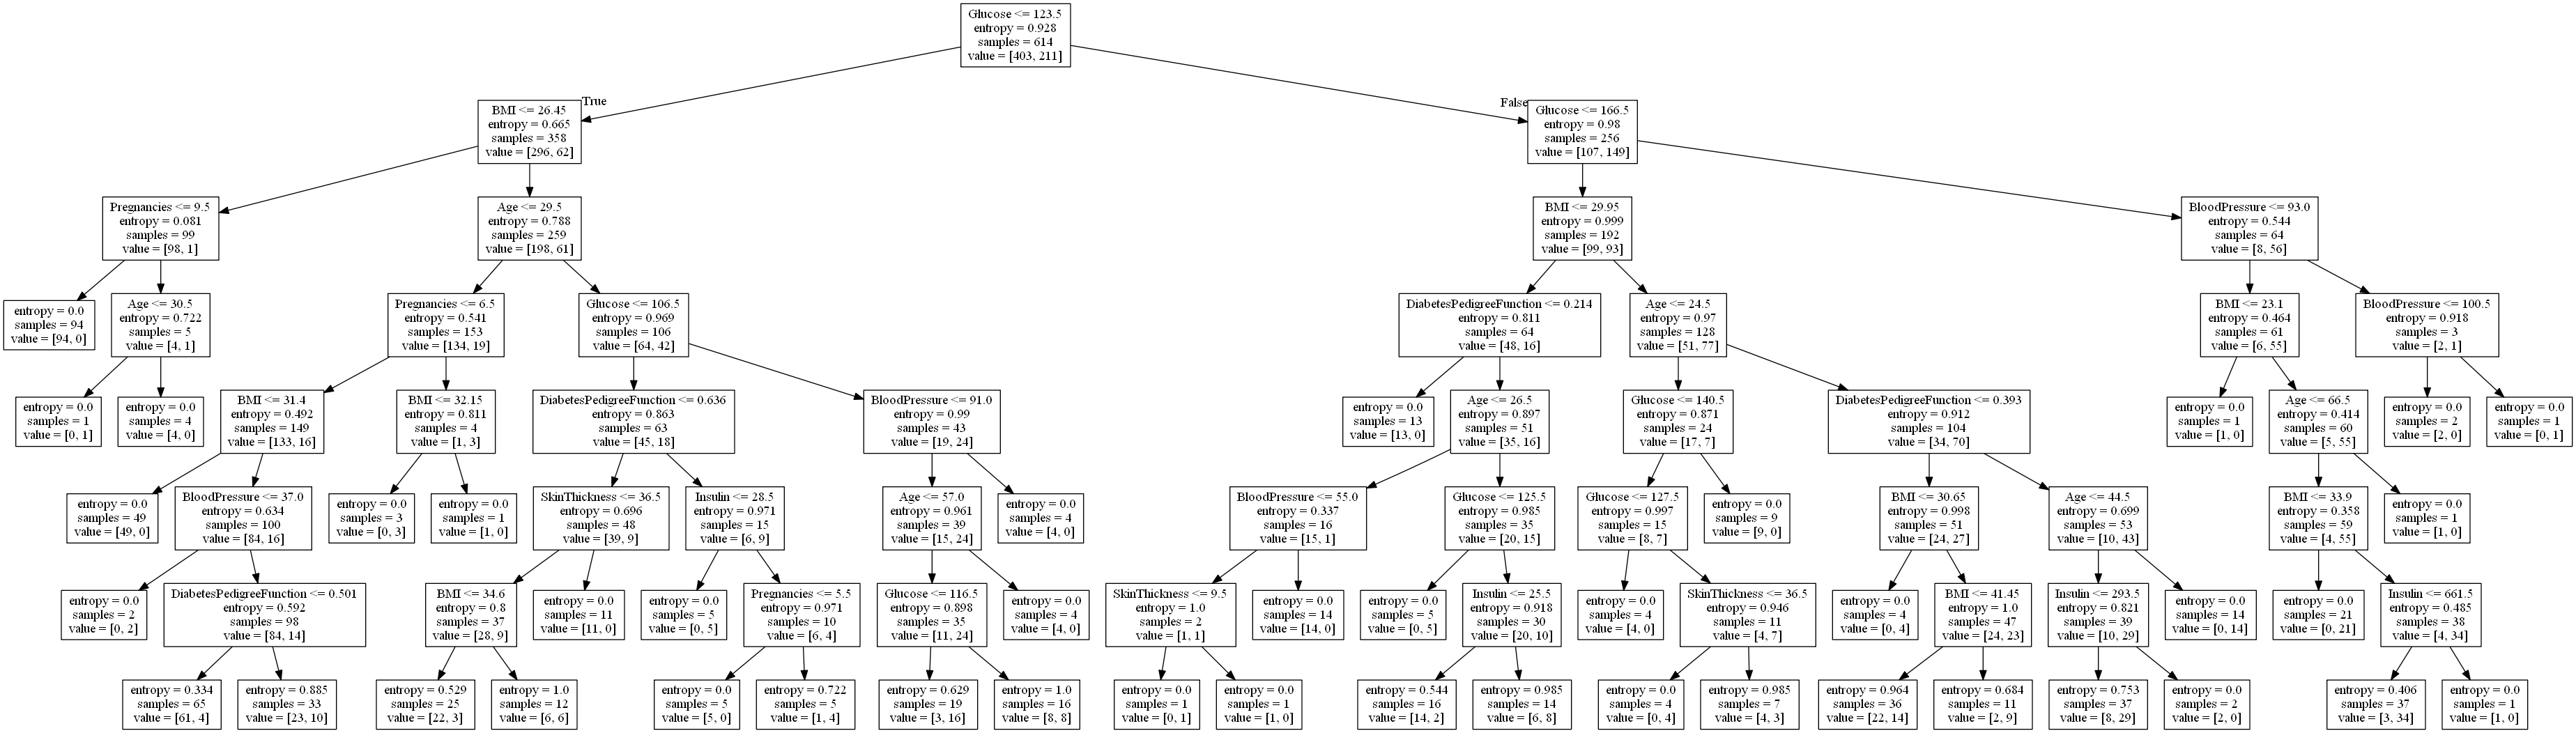

In [198]:
#GENERACIÓN DE IMAGEN ÁRBOL DE CLASIFICACIÓN
import os
import pydotplus
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

#COMANDO DE GENERACIÓN DE ARCHIVO .dot
DOT_ARBOL = export_graphviz(MODELO_ARBOL, feature_names=DATASET_ENTRENAMIENTO_X.columns.tolist())

#GENERANDO GRÁFICO CON EL ARBOL .dot GENERANDO
GRAFICO = graph_from_dot_data(DOT_ARBOL)

#NECESARIO PARA LA GENERACIÓN DEL PNG
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

#GENERACIÓN DEL GRÁFICO
GRAFICO.write_png('ARBOL_DIABETES_SIN_PODAR.png')

from IPython.display import Image
Image(filename="ARBOL_DIABETES_SIN_PODAR.png")

## PARTE 33.3: GENERACIÓN DE ÁRBOL DE CLASIFICACIÓN PODADO --> DIABETES

### GENERACIÓN DE ÁRBOL PODADO

In [199]:
#----------------------------------------------------------------------------
#IMPORTACIÓN DE DATASET
import pandas as pd
RUTA = "DATASETS - CERTIFICACIÓN/29_2_DIABETES.csv"
DATASET = pd.read_csv(RUTA)

#----------------------------------------------------------------------------
#DIVIDIR DATASET EN ENTRENAMIENTO Y PRUEBAS
from sklearn.model_selection import train_test_split
DATASET_ENTRENAMIENTO , DATASET_PRUEBAS = train_test_split(DATASET ,test_size = 0.2, random_state = 2021)

DATASET_ENTRENAMIENTO = DATASET_ENTRENAMIENTO.reset_index()
DATASET_ENTRENAMIENTO = DATASET_ENTRENAMIENTO.drop(["index"],axis = 1)

DATASET_PRUEBAS = DATASET_PRUEBAS.reset_index()
DATASET_PRUEBAS = DATASET_PRUEBAS.drop(["index"],axis = 1)

#----------------------------------------------------------------------------
#VARIABLES PREDICHAS Y PREDICTORAS
VY = "Outcome"
VX = DATASET.columns.tolist()
VX.remove(VY)

#GENERACIÓN DE DATASET PREDICHO Y PREDICTOR
DATASET_ENTRENAMIENTO_Y = DATASET_ENTRENAMIENTO[VY].copy()
DATASET_ENTRENAMIENTO_X = DATASET_ENTRENAMIENTO[VX].copy()

DATASET_PRUEBAS_Y = DATASET_PRUEBAS[VY].copy()
DATASET_PRUEBAS_X = DATASET_PRUEBAS[VX].copy()

#----------------------------------------------------------------------------
#AJUSTE ÓPTIMA DE ÁRBOL DE CLASIFICACIÓN
from sklearn.model_selection import GridSearchCV

param_grid = {'ccp_alpha': range(0,100)}    
ANALISIS_ARBOL = GridSearchCV(estimator = DecisionTreeClassifier(criterion = 'entropy', max_depth = None), 
                              param_grid = param_grid,   
                              cv = 5,
                              scoring = 'accuracy',
                              refit = True,
                              return_train_score = True)

ANALISIS_ARBOL.fit(DATASET_ENTRENAMIENTO_X, DATASET_ENTRENAMIENTO_Y)
MODELO_ARBOL = ANALISIS_ARBOL.best_estimator_

#----------------------------------------------------------------------------
#VARIABLES RELEVANTES DE ÁRBOL DE CLASIFICACIÓN
RANKING_VARIABLES = pd.DataFrame({
                            'VARIABLE': DATASET_ENTRENAMIENTO_X.columns.tolist(),
                            'IMPORTANCIA': MODELO_ARBOL.feature_importances_
                            })

RANKING_ORDENADO = RANKING_VARIABLES.sort_values('IMPORTANCIA', ascending=False).reset_index()
RANKING_ORDENADO = RANKING_ORDENADO.drop(["index"], axis = 1)

print("--------VARIABLES PREDICTORAS RELEVANTES--------")
print(RANKING_ORDENADO[RANKING_ORDENADO["IMPORTANCIA"]>0]["VARIABLE"].tolist())

#----------------------------------------------------------------------------
#INDICADORES ÓPTIMOS
print("MEJOR PARÁMETRO DE AJUSTE -> ",ANALISIS_ARBOL.best_params_)
print("PROFUNDIDAD ÓPTIMA -> ",MODELO_ARBOL.get_depth())
print("TERMINALES ÓPTIMOS -> ",MODELO_ARBOL.get_n_leaves())

#----------------------------------------------------------------------------
#GENERACIÓN DE PREDICCIÓN
DATASET_ENTRENAMIENTO["ÁRBOL PREDICT"] = MODELO_ARBOL.predict(DATASET_ENTRENAMIENTO_X)
DATASET_PRUEBAS["ÁRBOL PREDICT"] = MODELO_ARBOL.predict(DATASET_PRUEBAS_X)

#----------------------------------------------------------------------------
#SCORE DEL MODELO
print("---------------------------SCORE ÁRBOL PODADO---------------------------")
print("SCORE ÁRBOL ENTRENAMIENTO -> ",MODELO_ARBOL.score(X = DATASET_ENTRENAMIENTO_X , y = DATASET_ENTRENAMIENTO_Y))
print("SCORE ÁRBOL PRUEBAS -> ",MODELO_ARBOL.score(X = DATASET_PRUEBAS_X , y = DATASET_PRUEBAS_Y))

from sklearn.metrics import accuracy_score
PRECISION_MODELO = accuracy_score( y_true    = DATASET_PRUEBAS[VY],
                                   y_pred    = DATASET_PRUEBAS["ÁRBOL PREDICT"],
                                   normalize = True)
print("PRECISIÓN MODELO -> ", PRECISION_MODELO)

--------VARIABLES PREDICTORAS RELEVANTES--------
['Glucose', 'BMI', 'Age', 'BloodPressure', 'DiabetesPedigreeFunction', 'Insulin', 'Pregnancies', 'SkinThickness']
MEJOR PARÁMETRO DE AJUSTE ->  {'ccp_alpha': 0}
PROFUNDIDAD ÓPTIMA ->  15
TERMINALES ÓPTIMOS ->  106
---------------------------SCORE ÁRBOL PODADO---------------------------
SCORE ÁRBOL ENTRENAMIENTO ->  1.0
SCORE ÁRBOL PRUEBAS ->  0.6818181818181818
PRECISIÓN MODELO ->  0.6818181818181818


In [200]:
#GENERANDO TABLA CRUZADA - PRUEBAS
pd.crosstab(DATASET_PRUEBAS[VY], DATASET_PRUEBAS["ÁRBOL PREDICT"])

ÁRBOL PREDICT,0,1
Outcome,,
0,78,19
1,30,27


### GRÁFICA DE ÁRBOL DE CLASIFICACIÓN PODADO

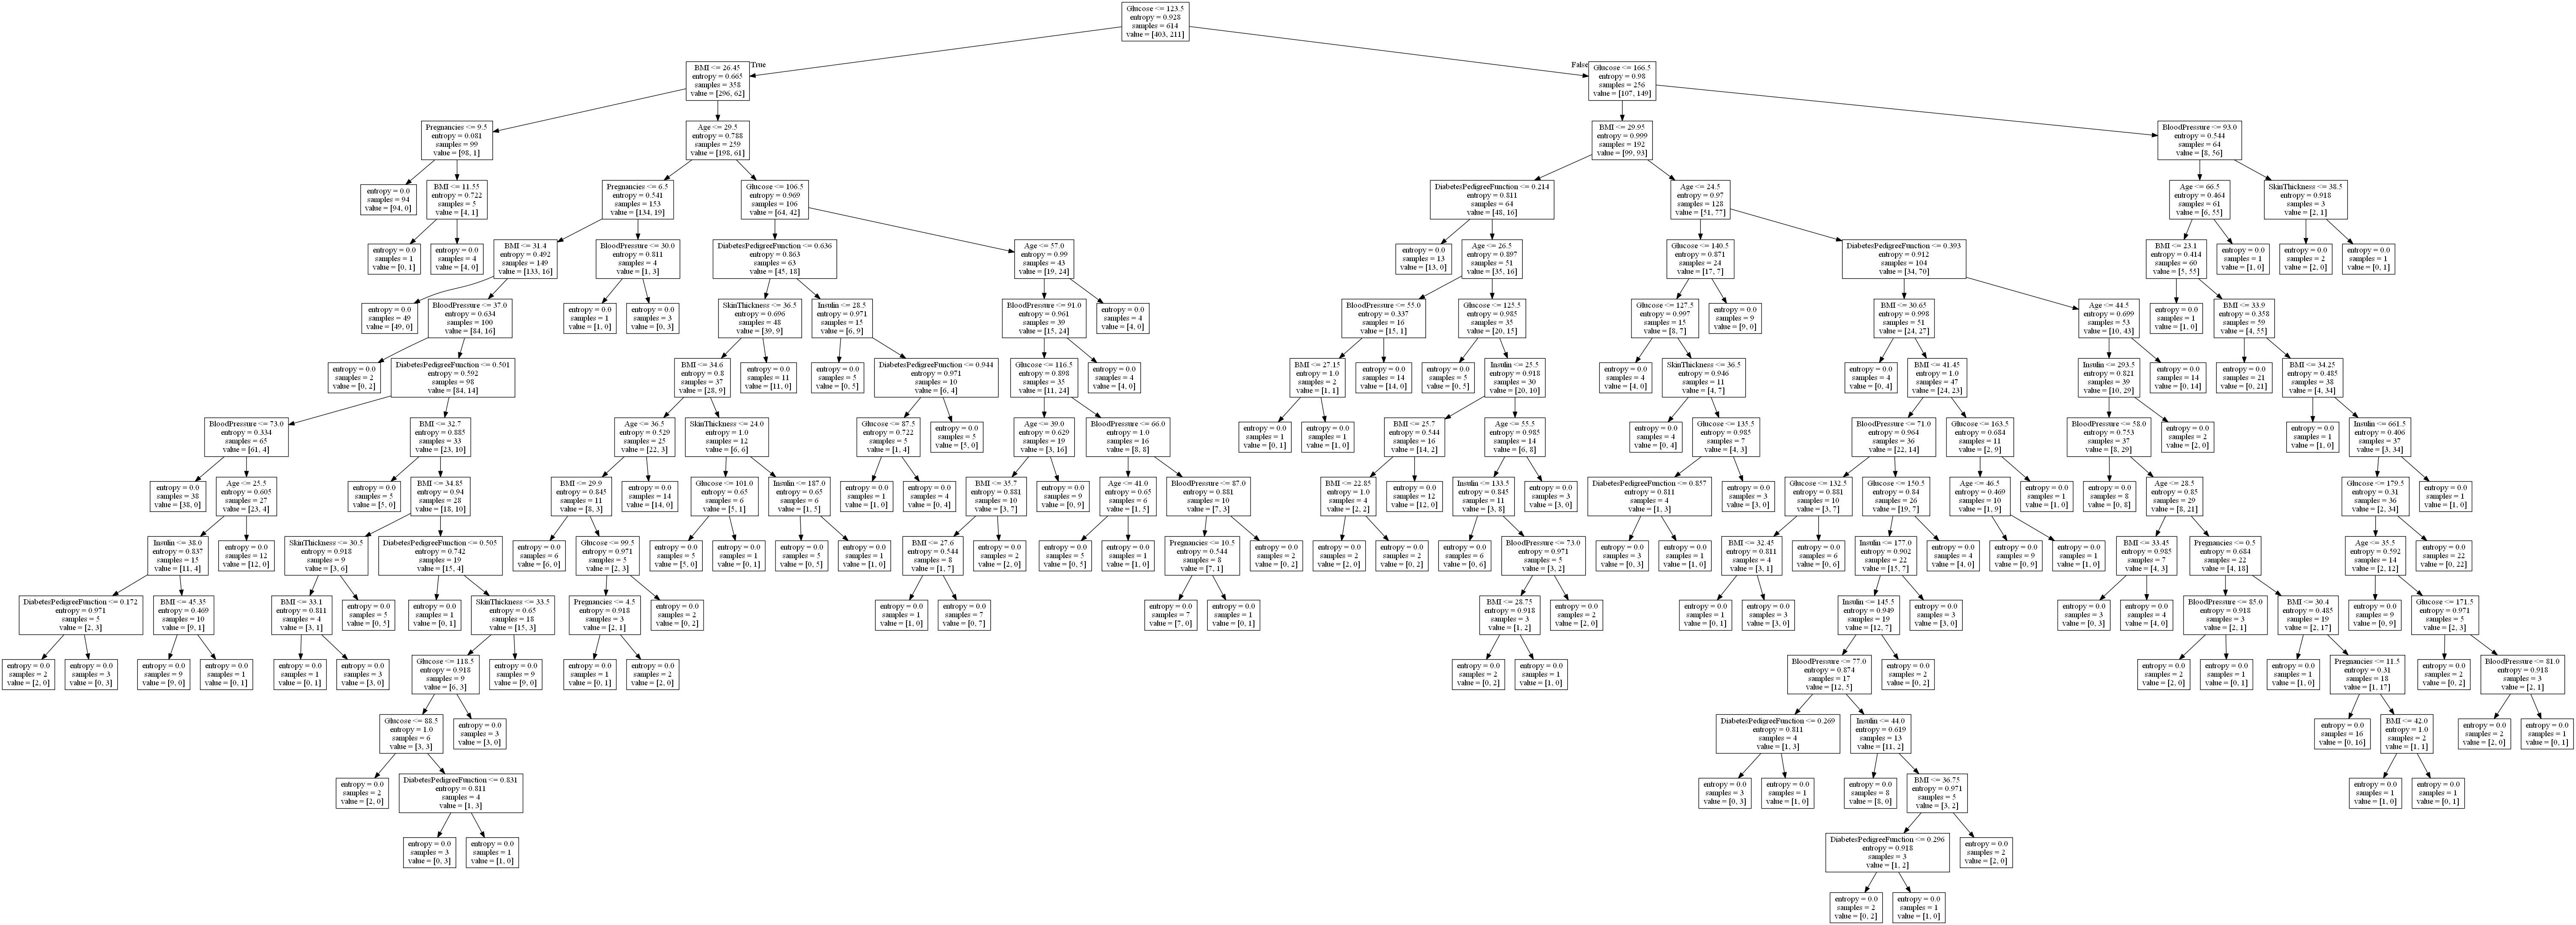

In [201]:
#GENERACIÓN DE IMAGEN ÁRBOL DE CLASIFICACIÓN
import os
import pydotplus
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

#COMANDO DE GENERACIÓN DE ARCHIVO .dot
DOT_ARBOL = export_graphviz(MODELO_ARBOL, feature_names=DATASET_ENTRENAMIENTO_X.columns.tolist())

#GENERANDO GRÁFICO CON EL ARBOL .dot GENERANDO
GRAFICO = graph_from_dot_data(DOT_ARBOL)

#NECESARIO PARA LA GENERACIÓN DEL PNG
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

#GENERACIÓN DEL GRÁFICO
GRAFICO.write_png('ARBOL_DIABETES_PODADO.png')

from IPython.display import Image
Image(filename="ARBOL_DIABETES_PODADO.png")

## PARTE 33.4: BOSQUE ALEATORIO DE CLASIFICACIÓN --> DIABETES

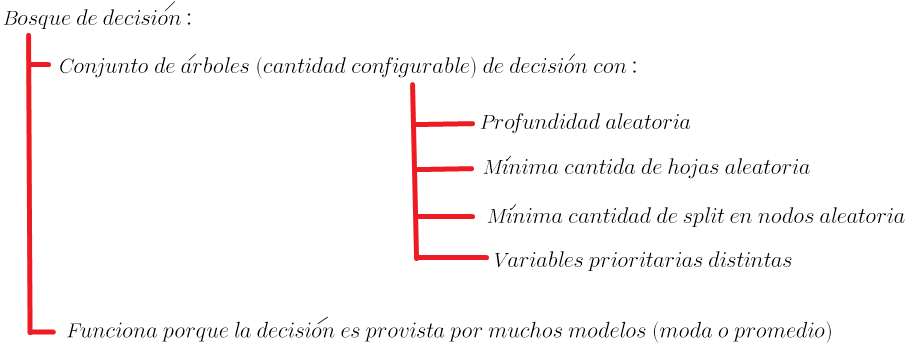

In [202]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/BOSQUE DECISIÓN.png")

### ANÁLISIS DE LA CANTIDAD DE ÁRBOLES ÓPTIMA

In [203]:
#----------------------------------------------------------------------------
#IMPORTACIÓN DE DATASET
import pandas as pd
RUTA = "DATASETS - CERTIFICACIÓN/29_2_DIABETES.csv"
DATASET = pd.read_csv(RUTA)

#----------------------------------------------------------------------------
#OBTENIENDO CANTIDAD DE ÁRBOLES ÓPTIMO DE UN BOSQUE DE CLASIFICACIÓN
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
import numpy as np

REP = KFold(n_splits=5)
SCORE = []
OOB_SCORE = []
ARBOLES = []

for VAL in range(40, 150, 5):
    FOLD_SCORE = []
    FOLD_OOB_SCORE = []
    MODELO_BOSQUE = RandomForestClassifier(oob_score=True , n_estimators=VAL)
    
    for INDICE_ENTRENAMIENTO , INDICE_PRUEBA in REP.split(DATASET):
        DATASET_ENTRENAMIENTO = DATASET.loc[INDICE_ENTRENAMIENTO]
        DATASET_PRUEBA = DATASET.loc[INDICE_PRUEBA]
        
        #VARIABLES PREDICHAS Y PREDICTORAS
        VY = "Outcome"
        VX = DATASET.columns.tolist()
        VX.remove(VY)
        
        #GENERACIÓN DE DATASET PREDICHO Y PREDICTOR
        DATASET_ENTRENAMIENTO_Y = DATASET_ENTRENAMIENTO[VY].copy()
        DATASET_ENTRENAMIENTO_X = DATASET_ENTRENAMIENTO[VX].copy()
        
        DATASET_PRUEBAS_Y = DATASET_PRUEBA[VY].copy()
        DATASET_PRUEBAS_X = DATASET_PRUEBA[VX].copy()
        
        #AJUSTE Y PRECISIÓN DEL MODELO
        MODELO_BOSQUE.fit(DATASET_ENTRENAMIENTO_X, DATASET_ENTRENAMIENTO_Y)
        
        VAL_SCORE = MODELO_BOSQUE.score(X = DATASET_PRUEBAS_X , y = DATASET_PRUEBAS_Y)
        VAL_OOB_SCORE = MODELO_BOSQUE.oob_score_
        
        FOLD_SCORE.append(VAL_SCORE)
        FOLD_OOB_SCORE.append(VAL_OOB_SCORE)
        
    PROM_SCORE = np.mean(FOLD_SCORE)
    PROM_OOB_SCORE = np.mean(FOLD_OOB_SCORE)
    
    OOB_SCORE.append(PROM_OOB_SCORE)
    SCORE.append(PROM_SCORE)
    ARBOLES.append(VAL)

DATASET_SCORE = pd.DataFrame({
    "ARBOLES":ARBOLES,
    "SCORE":SCORE,
    "OOB_SCORE":OOB_SCORE,
})

#ELIGIENDO PROFUNDIDAD CON PROFUNDIDAD ÓPTIMA
DATASET_SCORE[DATASET_SCORE["OOB_SCORE"]== np.max(DATASET_SCORE["OOB_SCORE"])]

,ARBOLES,SCORE,OOB_SCORE
20,140,0.763119,0.766602


### IMPLEMENTADO EL BOSQUE

In [204]:
#----------------------------------------------------------------------------
#IMPORTACIÓN DE DATASET
import pandas as pd
RUTA = "DATASETS - CERTIFICACIÓN/29_2_DIABETES.csv"
DATASET = pd.read_csv(RUTA)

#----------------------------------------------------------------------------
#DIVIDIR DATASET EN ENTRENAMIENTO Y PRUEBAS
from sklearn.model_selection import train_test_split
DATASET_ENTRENAMIENTO , DATASET_PRUEBAS = train_test_split(DATASET ,test_size = 0.2, random_state = 2021)

DATASET_ENTRENAMIENTO = DATASET_ENTRENAMIENTO.reset_index()
DATASET_ENTRENAMIENTO = DATASET_ENTRENAMIENTO.drop(["index"],axis = 1)

DATASET_PRUEBAS = DATASET_PRUEBAS.reset_index()
DATASET_PRUEBAS = DATASET_PRUEBAS.drop(["index"],axis = 1)

#----------------------------------------------------------------------------
#VARIABLES PREDICHAS Y PREDICTORAS
VY = "Outcome"
VX = DATASET.columns.tolist()
VX.remove(VY)

#GENERACIÓN DE DATASET PREDICHO Y PREDICTOR
DATASET_ENTRENAMIENTO_Y = DATASET_ENTRENAMIENTO[VY].copy()
DATASET_ENTRENAMIENTO_X = DATASET_ENTRENAMIENTO[VX].copy()

DATASET_PRUEBAS_Y = DATASET_PRUEBAS[VY].copy()
DATASET_PRUEBAS_X = DATASET_PRUEBAS[VX].copy()

#----------------------------------------------------------------------------
#GENERACIÓN DE BOSQUE DE CLASIFICACIÓN
from sklearn.ensemble import RandomForestClassifier
MODELO_BOSQUE = RandomForestClassifier(oob_score=True, n_estimators=90)
MODELO_BOSQUE.fit(DATASET_ENTRENAMIENTO_X, DATASET_ENTRENAMIENTO_Y)

#----------------------------------------------------------------------------
#GENERACIÓN DE PREDICCIÓN
DATASET_ENTRENAMIENTO["BOSQUE PREDICT"] = MODELO_BOSQUE.predict(DATASET_ENTRENAMIENTO_X)
DATASET_PRUEBAS["BOSQUE PREDICT"] = MODELO_BOSQUE.predict(DATASET_PRUEBAS_X)

#----------------------------------------------------------------------------
#SCORE DEL BOSQUE
print("---------------------------BOSQUE---------------------------")
print("SCORE BOSQUE ENTRENAMIENTO -> ",MODELO_BOSQUE.score(X = DATASET_ENTRENAMIENTO_X , y = DATASET_ENTRENAMIENTO_Y))
print("SCORE BOSQUE PRUEBAS -> ",MODELO_BOSQUE.score(X = DATASET_PRUEBAS_X , y = DATASET_PRUEBAS_Y))
print("OOB SCORE BOSQUE -> ",MODELO_BOSQUE.oob_score_)

from sklearn.metrics import accuracy_score
PRECISION_MODELO = accuracy_score( y_true    = DATASET_PRUEBAS[VY],
                                   y_pred    = DATASET_PRUEBAS["BOSQUE PREDICT"],
                                   normalize = True)
print("PRECISIÓN MODELO -> ", PRECISION_MODELO)

---------------------------BOSQUE---------------------------
SCORE BOSQUE ENTRENAMIENTO ->  1.0
SCORE BOSQUE PRUEBAS ->  0.7662337662337663
OOB SCORE BOSQUE ->  0.757328990228013
PRECISIÓN MODELO ->  0.7662337662337663


In [205]:
#GENERANDO TABLA CRUZADA - PRUEBAS
pd.crosstab(DATASET_PRUEBAS[VY], DATASET_PRUEBAS["BOSQUE PREDICT"])

BOSQUE PREDICT,0,1
Outcome,,
0,83,14
1,22,35


---------------------------SCORE ÁRBOL SIN PODAR---------------------------
SCORE ÁRBOL ENTRENAMIENTO ->  0.8811074918566775
SCORE ÁRBOL PRUEBAS ->  0.7012987012987013
PRECISIÓN MODELO ->  0.7012987012987013

---------------------------SCORE ÁRBOL PODADO---------------------------
SCORE ÁRBOL ENTRENAMIENTO ->  1.0
SCORE ÁRBOL PRUEBAS ->  0.7077922077922078
PRECISIÓN MODELO ->  0.7077922077922078

---------------------------BOSQUE---------------------------
SCORE BOSQUE ENTRENAMIENTO ->  1.0
SCORE BOSQUE PRUEBAS ->  0.7467532467532467
OOB SCORE BOSQUE ->  0.762214983713355
PRECISIÓN MODELO ->  0.7467532467532467

## PARTE 33.5: ANÁLISIS DE DATASET --> IRIS

In [206]:
import pandas as pd
RUTA = "DATASETS - CERTIFICACIÓN/33_4_ARBOLES_IRIS.csv"
DATASET = pd.read_csv(RUTA)
DATASET = DATASET.drop(["Id"] , axis = 1)
DATASET.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [207]:
#ANÁLISIS DE ESPECIES
DATASET_SPECIE = DATASET.groupby(["Species"])
DATASET_SPECIE.mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


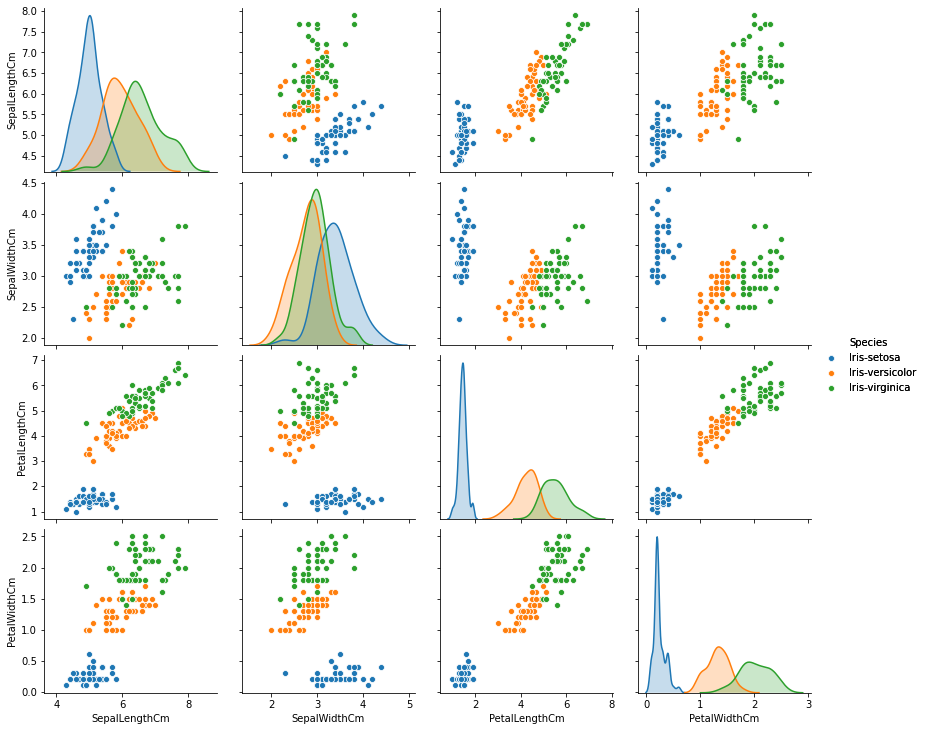

In [208]:
#ANÁLISIS MEDIANTE SEABORN
import seaborn as sns
sns.pairplot(DATASET,hue = "Species",diag_kind = "kde").add_legend()

------------------Iris-setosa------------------


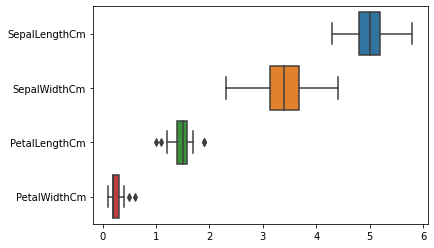

------------------Iris-versicolor------------------


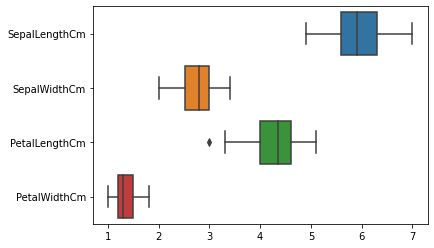

------------------Iris-virginica------------------


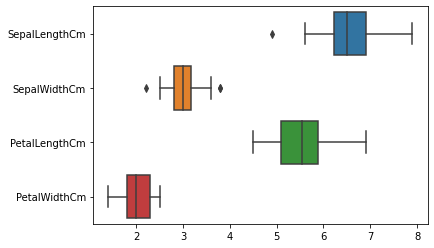

In [209]:
#ANÁLISIS MEDIANTE BOXPLOT
import matplotlib.pyplot as plt
import seaborn as sns

print("------------------Iris-setosa------------------")
sns.boxplot(data = DATASET[DATASET["Species"] == "Iris-setosa"] , orient = "h")
plt.show()
print("------------------Iris-versicolor------------------")
sns.boxplot(data = DATASET[DATASET["Species"] == "Iris-versicolor"] , orient = "h")
plt.show()
print("------------------Iris-virginica------------------")
sns.boxplot(data = DATASET[DATASET["Species"] == "Iris-virginica"] , orient = "h")
plt.show()

## PARTE 33.6: GENERACIÓN DE ÁRBOL CLASIFICACIÓN SIN PODAR--> IRIS

### GENERACIÓN DE ÁRBOL DE CLASIFICACIÓN SIN PODAR

In [210]:
#----------------------------------------------------------------------------
#IMPORTACIÓN DE DATASET
import pandas as pd
RUTA = "DATASETS - CERTIFICACIÓN/33_4_ARBOLES_IRIS.csv"
DATASET = pd.read_csv(RUTA)
DATASET = DATASET.drop(["Id"] , axis = 1)

#----------------------------------------------------------------------------
#DIVIDIR DATASET EN ENTRENAMIENTO Y PRUEBAS
from sklearn.model_selection import train_test_split
DATASET_ENTRENAMIENTO , DATASET_PRUEBAS = train_test_split(DATASET ,test_size = 0.2, random_state = 2021)

DATASET_ENTRENAMIENTO = DATASET_ENTRENAMIENTO.reset_index()
DATASET_ENTRENAMIENTO = DATASET_ENTRENAMIENTO.drop(["index"],axis = 1)

DATASET_PRUEBAS = DATASET_PRUEBAS.reset_index()
DATASET_PRUEBAS = DATASET_PRUEBAS.drop(["index"],axis = 1)

#----------------------------------------------------------------------------
#VARIABLES PREDICHAS Y PREDICTORAS
VY = "Species"
VX = DATASET.columns.tolist()
VX.remove(VY)

#GENERACIÓN DE DATASET PREDICHO Y PREDICTOR
DATASET_ENTRENAMIENTO_Y = DATASET_ENTRENAMIENTO[VY].copy()
DATASET_ENTRENAMIENTO_X = DATASET_ENTRENAMIENTO[VX].copy()

DATASET_PRUEBAS_Y = DATASET_PRUEBAS[VY].copy()
DATASET_PRUEBAS_X = DATASET_PRUEBAS[VX].copy()

#----------------------------------------------------------------------------
#GENERACIÓN DE ÁRBOL DE CLASIFICACIÓN
from sklearn.tree import DecisionTreeClassifier
#criterion -> entropy / gini
#min_samples_split -> CANTIDAD MÍNIMA DE MUESTRAS EN UN NODO PARA SUBDIVIDIRSE
#min_samples_leaf -> CANTIDAD MÍNIMA DE MUESTRAS EN UNA HOJA PARA EXISTIR 
#max_depth -> PROFUNDIDAD MÁXIMA PERMITIDA 

MODELO_ARBOL = DecisionTreeClassifier(criterion = 'entropy' , max_depth=4)
MODELO_ARBOL.fit(DATASET_ENTRENAMIENTO_X, DATASET_ENTRENAMIENTO_Y)

#----------------------------------------------------------------------------
#VARIABLES RELEVANTES DE ÁRBOL DE CLASIFICACIÓN
RANKING_VARIABLES = pd.DataFrame({
                            'VARIABLE': DATASET_ENTRENAMIENTO_X.columns.tolist(),
                            'IMPORTANCIA': MODELO_ARBOL.feature_importances_
                            })

RANKING_ORDENADO = RANKING_VARIABLES.sort_values('IMPORTANCIA', ascending=False).reset_index()
RANKING_ORDENADO = RANKING_ORDENADO.drop(["index"], axis = 1)

print("--------VARIABLES PREDICTORAS RELEVANTES--------")
print(RANKING_ORDENADO[RANKING_ORDENADO["IMPORTANCIA"]>0]["VARIABLE"].tolist())

#----------------------------------------------------------------------------
#GENERACIÓN DE PREDICCIÓN
DATASET_ENTRENAMIENTO["ÁRBOL PREDICT"] = MODELO_ARBOL.predict(DATASET_ENTRENAMIENTO_X)
DATASET_PRUEBAS["ÁRBOL PREDICT"] = MODELO_ARBOL.predict(DATASET_PRUEBAS_X)

#----------------------------------------------------------------------------
#SCORE DEL MODELO
print("---------------------------SCORE ÁRBOL SIN PODAR---------------------------")
print("SCORE ÁRBOL ENTRENAMIENTO -> ",MODELO_ARBOL.score(X = DATASET_ENTRENAMIENTO_X , y = DATASET_ENTRENAMIENTO_Y))
print("SCORE ÁRBOL PRUEBAS -> ",MODELO_ARBOL.score(X = DATASET_PRUEBAS_X , y = DATASET_PRUEBAS_Y))

from sklearn.metrics import accuracy_score
PRECISION_MODELO = accuracy_score( y_true    = DATASET_PRUEBAS[VY],
                                   y_pred    = DATASET_PRUEBAS["ÁRBOL PREDICT"],
                                   normalize = True)
print("PRECISIÓN MODELO -> ", 100*PRECISION_MODELO)

--------VARIABLES PREDICTORAS RELEVANTES--------
['PetalWidthCm', 'SepalWidthCm', 'PetalLengthCm']
---------------------------SCORE ÁRBOL SIN PODAR---------------------------
SCORE ÁRBOL ENTRENAMIENTO ->  0.9833333333333333
SCORE ÁRBOL PRUEBAS ->  0.9
PRECISIÓN MODELO ->  90.0


In [211]:
#GENERANDO TABLA CRUZADA - PRUEBAS
pd.crosstab(DATASET_PRUEBAS[VY], DATASET_PRUEBAS["ÁRBOL PREDICT"])

ÁRBOL PREDICT,Iris-setosa,Iris-versicolor,Iris-virginica
Species,,,
Iris-setosa,14,0,0
Iris-versicolor,0,9,1
Iris-virginica,0,2,4


### GRÁFICA DE ÁRBOL DE CLASIFICACIÓN SIN PODAR

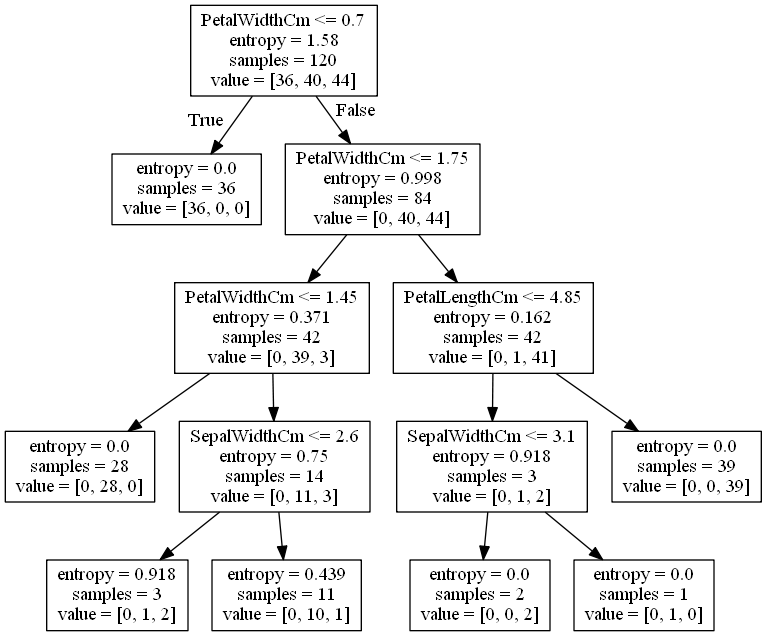

In [212]:
#GENERACIÓN DE IMAGEN ÁRBOL DE CLASIFICACIÓN
import os
import pydotplus
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

#COMANDO DE GENERACIÓN DE ARCHIVO .dot
DOT_ARBOL = export_graphviz(MODELO_ARBOL, feature_names=DATASET_ENTRENAMIENTO_X.columns.tolist())

#GENERANDO GRÁFICO CON EL ARBOL .dot GENERANDO
GRAFICO = graph_from_dot_data(DOT_ARBOL)

#NECESARIO PARA LA GENERACIÓN DEL PNG
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

#GENERACIÓN DEL GRÁFICO
GRAFICO.write_png('ARBOL_IRIS_SIN_PODAR.png')

from IPython.display import Image
Image(filename="ARBOL_IRIS_SIN_PODAR.png")

## PARTE 33.7: GENERACIÓN DE ÁRBOL CLASIFICACIÓN PODADO --> IRIS

In [213]:
#----------------------------------------------------------------------------
#IMPORTACIÓN DE DATASET
import pandas as pd
RUTA = "DATASETS - CERTIFICACIÓN/33_4_ARBOLES_IRIS.csv"
DATASET = pd.read_csv(RUTA)
DATASET = DATASET.drop(["Id"] , axis = 1)

#----------------------------------------------------------------------------
#DIVIDIR DATASET EN ENTRENAMIENTO Y PRUEBAS
from sklearn.model_selection import train_test_split
DATASET_ENTRENAMIENTO , DATASET_PRUEBAS = train_test_split(DATASET ,test_size = 0.2, random_state = 2021)

DATASET_ENTRENAMIENTO = DATASET_ENTRENAMIENTO.reset_index()
DATASET_ENTRENAMIENTO = DATASET_ENTRENAMIENTO.drop(["index"],axis = 1)

DATASET_PRUEBAS = DATASET_PRUEBAS.reset_index()
DATASET_PRUEBAS = DATASET_PRUEBAS.drop(["index"],axis = 1)

#----------------------------------------------------------------------------
#VARIABLES PREDICHAS Y PREDICTORAS
VY = "Species"
VX = DATASET.columns.tolist()
VX.remove(VY)

#GENERACIÓN DE DATASET PREDICHO Y PREDICTOR
DATASET_ENTRENAMIENTO_Y = DATASET_ENTRENAMIENTO[VY].copy()
DATASET_ENTRENAMIENTO_X = DATASET_ENTRENAMIENTO[VX].copy()

DATASET_PRUEBAS_Y = DATASET_PRUEBAS[VY].copy()
DATASET_PRUEBAS_X = DATASET_PRUEBAS[VX].copy()

#----------------------------------------------------------------------------
#AJUSTE ÓPTIMA DE ÁRBOL DE CLASIFICACIÓN
from sklearn.model_selection import GridSearchCV

param_grid = {'ccp_alpha': range(0,100)}    
ANALISIS_ARBOL = GridSearchCV(estimator = DecisionTreeClassifier(criterion = 'entropy', max_depth = None), 
                              param_grid = param_grid,   
                              cv = 5,
                              scoring = 'accuracy',
                              refit = True,
                              return_train_score = True)

ANALISIS_ARBOL.fit(DATASET_ENTRENAMIENTO_X, DATASET_ENTRENAMIENTO_Y)
MODELO_ARBOL = ANALISIS_ARBOL.best_estimator_

#----------------------------------------------------------------------------
#VARIABLES RELEVANTES DE ÁRBOL DE CLASIFICACIÓN
RANKING_VARIABLES = pd.DataFrame({
                            'VARIABLE': DATASET_ENTRENAMIENTO_X.columns.tolist(),
                            'IMPORTANCIA': MODELO_ARBOL.feature_importances_
                            })

RANKING_ORDENADO = RANKING_VARIABLES.sort_values('IMPORTANCIA', ascending=False).reset_index()
RANKING_ORDENADO = RANKING_ORDENADO.drop(["index"], axis = 1)

print("--------VARIABLES PREDICTORAS RELEVANTES--------")
print(RANKING_ORDENADO[RANKING_ORDENADO["IMPORTANCIA"]>0]["VARIABLE"].tolist())

#----------------------------------------------------------------------------
#INDICADORES ÓPTIMOS
print("MEJOR PARÁMETRO DE AJUSTE -> ",ANALISIS_ARBOL.best_params_)
print("PROFUNDIDAD ÓPTIMA -> ",MODELO_ARBOL.get_depth())
print("TERMINALES ÓPTIMOS -> ",MODELO_ARBOL.get_n_leaves())

#----------------------------------------------------------------------------
#GENERACIÓN DE PREDICCIÓN
DATASET_ENTRENAMIENTO["ÁRBOL PREDICT"] = MODELO_ARBOL.predict(DATASET_ENTRENAMIENTO_X)
DATASET_PRUEBAS["ÁRBOL PREDICT"] = MODELO_ARBOL.predict(DATASET_PRUEBAS_X)

#----------------------------------------------------------------------------
#SCORE DEL MODELO
print("---------------------------SCORE ÁRBOL PODADO---------------------------")
print("SCORE ÁRBOL ENTRENAMIENTO -> ",MODELO_ARBOL.score(X = DATASET_ENTRENAMIENTO_X , y = DATASET_ENTRENAMIENTO_Y))
print("SCORE ÁRBOL PRUEBAS -> ",MODELO_ARBOL.score(X = DATASET_PRUEBAS_X , y = DATASET_PRUEBAS_Y))

from sklearn.metrics import accuracy_score
PRECISION_MODELO = accuracy_score( y_true    = DATASET_PRUEBAS[VY],
                                   y_pred    = DATASET_PRUEBAS["ÁRBOL PREDICT"],
                                   normalize = True)
print("PRECISIÓN MODELO -> ", PRECISION_MODELO)

--------VARIABLES PREDICTORAS RELEVANTES--------
['PetalWidthCm', 'PetalLengthCm', 'SepalLengthCm', 'SepalWidthCm']
MEJOR PARÁMETRO DE AJUSTE ->  {'ccp_alpha': 0}
PROFUNDIDAD ÓPTIMA ->  5
TERMINALES ÓPTIMOS ->  9
---------------------------SCORE ÁRBOL PODADO---------------------------
SCORE ÁRBOL ENTRENAMIENTO ->  1.0
SCORE ÁRBOL PRUEBAS ->  0.9333333333333333
PRECISIÓN MODELO ->  0.9333333333333333


In [214]:
#GENERANDO TABLA CRUZADA - PRUEBAS
pd.crosstab(DATASET_PRUEBAS[VY], DATASET_PRUEBAS["ÁRBOL PREDICT"])

ÁRBOL PREDICT,Iris-setosa,Iris-versicolor,Iris-virginica
Species,,,
Iris-setosa,14,0,0
Iris-versicolor,0,10,0
Iris-virginica,0,2,4


### GRÁFICA DE ÁRBOL DE CLASIFICACIÓN PODADO

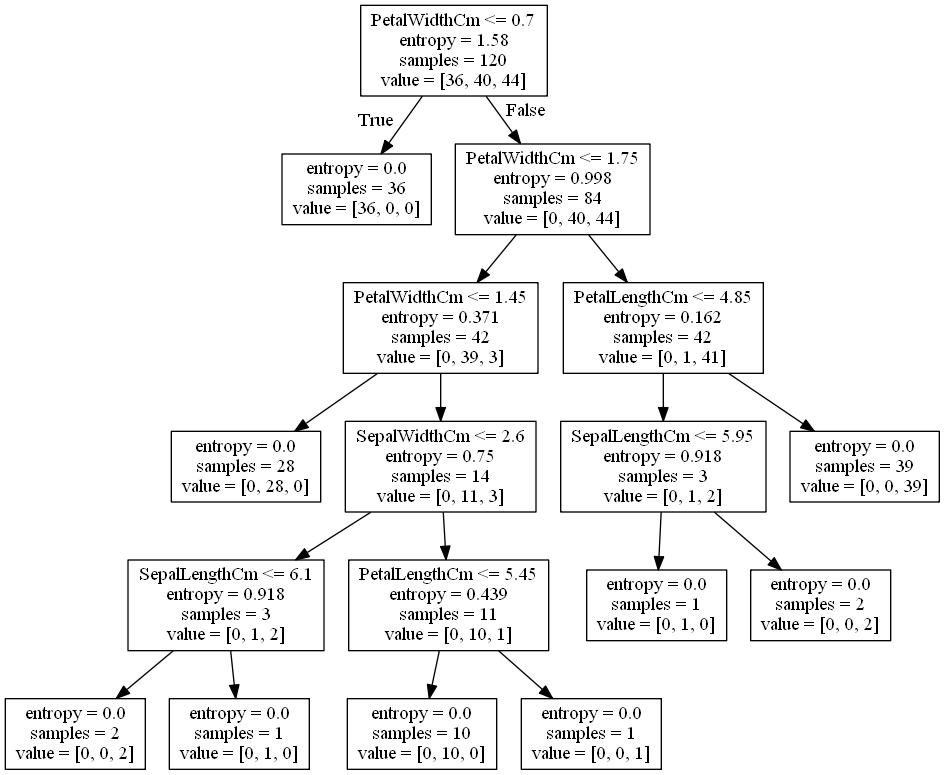

In [215]:
#GENERACIÓN DE IMAGEN ÁRBOL DE CLASIFICACIÓN
import os
import pydotplus
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

#COMANDO DE GENERACIÓN DE ARCHIVO .dot
DOT_ARBOL = export_graphviz(MODELO_ARBOL, feature_names=DATASET_ENTRENAMIENTO_X.columns.tolist())

#GENERANDO GRÁFICO CON EL ARBOL .dot GENERANDO
GRAFICO = graph_from_dot_data(DOT_ARBOL)

#NECESARIO PARA LA GENERACIÓN DEL PNG
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

#GENERACIÓN DEL GRÁFICO
GRAFICO.write_png('ARBOL_IRIS_PODADO.png')

from IPython.display import Image
Image(filename="ARBOL_IRIS_PODADO.png")

## PARTE 33.8: BOSQUE ALEATORIO DE CLASIFICACIÓN --> IRIS

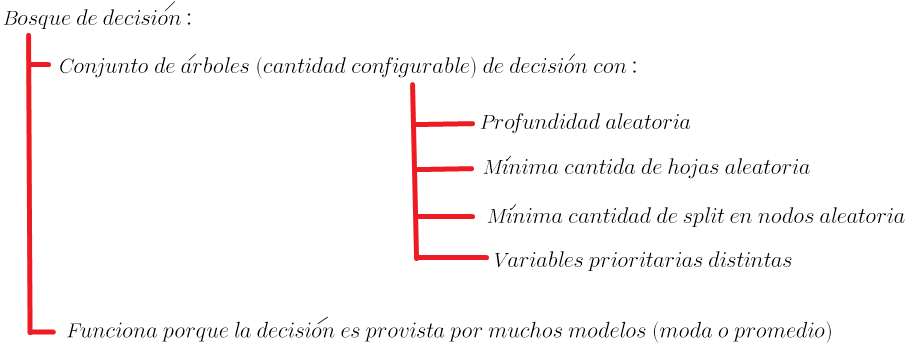

In [216]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/BOSQUE DECISIÓN.png")

### ANÁLISIS DE LA CANTIDAD DE ÁRBOLES ÓPTIMA

In [217]:
#----------------------------------------------------------------------------
#IMPORTACIÓN DE DATASET
import pandas as pd
RUTA = "DATASETS - CERTIFICACIÓN/33_4_ARBOLES_IRIS.csv"
DATASET = pd.read_csv(RUTA)
DATASET = DATASET.drop(["Id"] , axis = 1)

#----------------------------------------------------------------------------
#OBTENIENDO CANTIDAD DE ÁRBOLES ÓPTIMO DE UN BOSQUE DE CLASIFICACIÓN
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
import numpy as np

REP = KFold(n_splits=5)
SCORE = []
OOB_SCORE = []
ARBOLES = []

for VAL in range(40, 150, 5):
    FOLD_SCORE = []
    FOLD_OOB_SCORE = []
    MODELO_BOSQUE = RandomForestClassifier(oob_score=True , n_estimators=VAL)
    
    for INDICE_ENTRENAMIENTO , INDICE_PRUEBA in REP.split(DATASET):
        DATASET_ENTRENAMIENTO = DATASET.loc[INDICE_ENTRENAMIENTO]
        DATASET_PRUEBA = DATASET.loc[INDICE_PRUEBA]
        
        #VARIABLES PREDICHAS Y PREDICTORAS
        VY = "Species"
        VX = DATASET.columns.tolist()
        VX.remove(VY)
        
        #GENERACIÓN DE DATASET PREDICHO Y PREDICTOR
        DATASET_ENTRENAMIENTO_Y = DATASET_ENTRENAMIENTO[VY].copy()
        DATASET_ENTRENAMIENTO_X = DATASET_ENTRENAMIENTO[VX].copy()
        
        DATASET_PRUEBAS_Y = DATASET_PRUEBA[VY].copy()
        DATASET_PRUEBAS_X = DATASET_PRUEBA[VX].copy()
        
        #AJUSTE Y PRECISIÓN DEL MODELO
        MODELO_BOSQUE.fit(DATASET_ENTRENAMIENTO_X, DATASET_ENTRENAMIENTO_Y)
        
        VAL_SCORE = MODELO_BOSQUE.score(X = DATASET_PRUEBAS_X , y = DATASET_PRUEBAS_Y)
        VAL_OOB_SCORE = MODELO_BOSQUE.oob_score_
        
        FOLD_SCORE.append(VAL_SCORE)
        FOLD_OOB_SCORE.append(VAL_OOB_SCORE)
        
    PROM_SCORE = np.mean(FOLD_SCORE)
    PROM_OOB_SCORE = np.mean(FOLD_OOB_SCORE)
    
    OOB_SCORE.append(PROM_OOB_SCORE)
    SCORE.append(PROM_SCORE)
    ARBOLES.append(VAL)

DATASET_SCORE = pd.DataFrame({
    "ARBOLES":ARBOLES,
    "SCORE":SCORE,
    "OOB_SCORE":OOB_SCORE,
})

#ELIGIENDO PROFUNDIDAD CON PROFUNDIDAD ÓPTIMA
DATASET_SCORE[DATASET_SCORE["OOB_SCORE"]== np.max(DATASET_SCORE["OOB_SCORE"])]

,ARBOLES,SCORE,OOB_SCORE
16,120,0.906667,0.96


### IMPLEMENTADO EL BOSQUE

In [218]:
#----------------------------------------------------------------------------
#IMPORTACIÓN DE DATASET
import pandas as pd
RUTA = "DATASETS - CERTIFICACIÓN/33_4_ARBOLES_IRIS.csv"
DATASET = pd.read_csv(RUTA)
DATASET = DATASET.drop(["Id"] , axis = 1)

#----------------------------------------------------------------------------
#DIVIDIR DATASET EN ENTRENAMIENTO Y PRUEBAS
from sklearn.model_selection import train_test_split
DATASET_ENTRENAMIENTO , DATASET_PRUEBAS = train_test_split(DATASET ,test_size = 0.2, random_state = 2021)

DATASET_ENTRENAMIENTO = DATASET_ENTRENAMIENTO.reset_index()
DATASET_ENTRENAMIENTO = DATASET_ENTRENAMIENTO.drop(["index"],axis = 1)

DATASET_PRUEBAS = DATASET_PRUEBAS.reset_index()
DATASET_PRUEBAS = DATASET_PRUEBAS.drop(["index"],axis = 1)

#----------------------------------------------------------------------------
#VARIABLES PREDICHAS Y PREDICTORAS
VY = "Species"
VX = DATASET.columns.tolist()
VX.remove(VY)

#GENERACIÓN DE DATASET PREDICHO Y PREDICTOR
DATASET_ENTRENAMIENTO_Y = DATASET_ENTRENAMIENTO[VY].copy()
DATASET_ENTRENAMIENTO_X = DATASET_ENTRENAMIENTO[VX].copy()

DATASET_PRUEBAS_Y = DATASET_PRUEBAS[VY].copy()
DATASET_PRUEBAS_X = DATASET_PRUEBAS[VX].copy()

#----------------------------------------------------------------------------
#GENERACIÓN DE BOSQUE DE CLASIFICACIÓN
from sklearn.ensemble import RandomForestClassifier
MODELO_BOSQUE = RandomForestClassifier(oob_score=True, n_estimators=80)
MODELO_BOSQUE.fit(DATASET_ENTRENAMIENTO_X, DATASET_ENTRENAMIENTO_Y)

#----------------------------------------------------------------------------
#GENERACIÓN DE PREDICCIÓN
DATASET_ENTRENAMIENTO["BOSQUE PREDICT"] = MODELO_BOSQUE.predict(DATASET_ENTRENAMIENTO_X)
DATASET_PRUEBAS["BOSQUE PREDICT"] = MODELO_BOSQUE.predict(DATASET_PRUEBAS_X)

#----------------------------------------------------------------------------
#SCORE DEL BOSQUE
print("---------------------------BOSQUE---------------------------")
print("SCORE BOSQUE ENTRENAMIENTO -> ",MODELO_BOSQUE.score(X = DATASET_ENTRENAMIENTO_X , y = DATASET_ENTRENAMIENTO_Y))
print("SCORE BOSQUE PRUEBAS -> ",MODELO_BOSQUE.score(X = DATASET_PRUEBAS_X , y = DATASET_PRUEBAS_Y))
print("OOB SCORE BOSQUE -> ",MODELO_BOSQUE.oob_score_)

from sklearn.metrics import accuracy_score
PRECISION_MODELO = accuracy_score( y_true    = DATASET_PRUEBAS[VY],
                                   y_pred    = DATASET_PRUEBAS["BOSQUE PREDICT"],
                                   normalize = True)
print("PRECISIÓN MODELO -> ", PRECISION_MODELO)

---------------------------BOSQUE---------------------------
SCORE BOSQUE ENTRENAMIENTO ->  1.0
SCORE BOSQUE PRUEBAS ->  0.9333333333333333
OOB SCORE BOSQUE ->  0.95
PRECISIÓN MODELO ->  0.9333333333333333


In [219]:
#GENERANDO TABLA CRUZADA - PRUEBAS
pd.crosstab(DATASET_PRUEBAS[VY], DATASET_PRUEBAS["BOSQUE PREDICT"])

BOSQUE PREDICT,Iris-setosa,Iris-versicolor,Iris-virginica
Species,,,
Iris-setosa,14,0,0
Iris-versicolor,0,10,0
Iris-virginica,0,2,4


---------------------------SCORE ÁRBOL SIN PODAR---------------------------
SCORE ÁRBOL ENTRENAMIENTO ->  0.9833333333333333
SCORE ÁRBOL PRUEBAS ->  0.9
PRECISIÓN MODELO ->  90.0

---------------------------SCORE ÁRBOL PODADO---------------------------
SCORE ÁRBOL ENTRENAMIENTO ->  1.0
SCORE ÁRBOL PRUEBAS ->  0.9333333333333333
PRECISIÓN MODELO ->  0.9333333333333333

---------------------------BOSQUE---------------------------
SCORE BOSQUE ENTRENAMIENTO ->  1.0
SCORE BOSQUE PRUEBAS ->  0.9333333333333333
OOB SCORE BOSQUE ->  0.95
PRECISIÓN MODELO ->  0.9333333333333333